In [1]:
# Importando bibliotecas

import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Paramêtros para plotting

plt.style.use('science')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Regressão linear

Mas como sabemos se a nossa escolha de parâmetros foi boa e que o nosso modelo esteja funcionando tão bem quanto possível? Uma maneira é atraves do **erro quadrático médio**:

$$ MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 $$

Erro, quadrático, médio.

In [3]:
# Calcular o erro sem tomar o quadrado ou módulo faz com que erros pra cima e para baixo se compensem 

y = [2, 3, 4] # Os valores que queriamos acertar
y_pred = [0, 3, 6] # Os valores que prevemos

m = len(y) # Número de instâncias

error = 0.0 # Inicializando a variável 

for i in range(m):
    error += (y[i] - y_pred[i]) # não elevamos ao quadrado ou tomamos módulo !

error = error/m
print("O erro é: ", error)

O erro é:  0.0


In [4]:
# Agora vamos calcular o MSE

mse = 0.0

for i in range(m):
    mse += (y[i] - y_pred[i])**2

mse = mse/m
print(f"Erro quadrático médio: ", mse)
print(f"Raiz do erro quadrático médio: ", np.sqrt(mse))

Erro quadrático médio:  2.6666666666666665
Raiz do erro quadrático médio:  1.632993161855452


In [5]:
# Alternativamente poderiamos tomar o módulo 

abs_error = 0.0

for i in range(m):
    abs_error += abs(y[i] - y_pred[i])

abs_error = abs_error/m
print(f"Erro absoluto: ", abs_error)

Erro absoluto:  1.3333333333333333


Note que o erro quadrático médio *pune* mais fortemente nosso modelo que o erro absoluto.

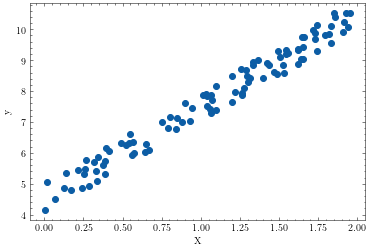

In [6]:
X = 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Esse tipo de problema tem solução exata e é dado pela **Equação Normal**.

$$ \bf{X} \bf{\theta} =
\begin{bmatrix}
1 & x_{1}^{1}\\
1 & x_{2}^{1}
\end{bmatrix}
\begin{bmatrix}
\theta_{0}\\
\theta_{1}
\end{bmatrix}
=
\begin{bmatrix}
\theta_{0} + \theta_{1} x_{1}^{1}\\
\theta_{0} + \theta_{1} x_{1}^{2}
\end{bmatrix}
=
\begin{bmatrix}
\hat{y}^{1}\\
\hat{y}^{2}
\end{bmatrix}
=
\bf{\hat{y}}
$$

## Equação normal

Nós temos N *features*, e M *instâncias*.

Vetores *Target* e *predict*:

\begin{equation}
\mathbf{y} = 
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^N
\end{bmatrix},  \qquad
\mathbf{\hat{y}} = 
\begin{bmatrix}
\hat{y}^1 \\
\hat{y}^2 \\
\vdots \\
\hat{y}^N
\end{bmatrix}.
\end{equation}

*Pesos*:

\begin{equation}
\mathbf{\theta} = 
\begin{bmatrix}
\theta^1 \\
\theta^2 \\
\vdots \\
\theta^N
\end{bmatrix}
\end{equation}

Matriz X:

\begin{equation}
X = 
\begin{pmatrix}
x^{1}_{0} & x^{1}_{1} & \dots & x^{1}_{N} \\
x^{2}_{0} & x^{2}_{1} & \dots & x^{2}_{N} \\
\vdots & & \ddots \\
x^{m}_{0} &  x^{m}_{1} & \dots   & x^{m}_{N}
\end{pmatrix}
\end{equation}

\begin{equation}
\mathbf{\hat{y}} = X \mathbf{\theta}
\end{equation}

Função custo:

\begin{equation}
J(\theta) = (X \mathbf{\theta} - \mathbf{y})^T(X \mathbf{\theta} - \mathbf{y}) = X^T\theta^T X\theta - X^T\theta^T y - X\theta y^T + y^Ty
\end{equation}



\begin{equation}
\nabla_{\theta}J = 0
\end{equation}

Propriedades
\begin{equation}
\nabla_{\theta}(\theta^Ta) = \nabla_{\theta}(a^T \theta) 
\end{equation}

\begin{align}
i)& \, \nabla_{\theta}(X^T \theta^T X \theta) = X^T X \left[\theta^T  \nabla_{\theta}(\theta) + \theta\nabla_{\theta}(\theta^T) \right] = 2 X^T X \theta \\
ii)& \, \nabla_{\theta}(X^T \theta^T y) = \nabla_{\theta}(X^T y \theta^T) =  X^T y \\
iii)& \, \nabla_{\theta}(X \theta y^T) = \nabla_{\theta}(X y^T \theta) = \nabla_{\theta}(\theta^T X^T y) = X^T y \\
iv)& \, \nabla_{\theta}(y^T y) = 0
\end{align}

\begin{equation}
2 X^T X \hat{\theta}- 2X^Ty = 0
\end{equation}

\begin{equation}
X^T X \hat{\theta} = X^Ty
\end{equation}

\begin{equation}
(X^T X)^{-1} X^T X \hat{\theta} = (X^T X)^{-1} X^Ty
\end{equation}

\begin{equation}
\hat{\theta} = (X^T X)^{-1} X^Ty
\end{equation}

$$\hat{\theta} = (X^T X)^{-1}X^Ty$$

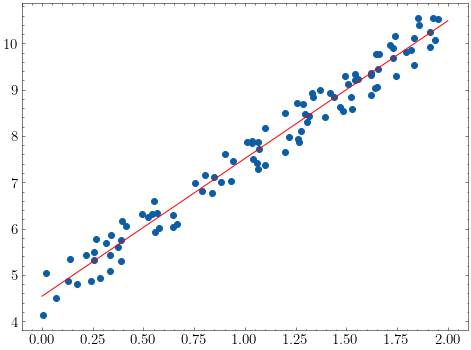

In [48]:
X_b = np.column_stack((np.ones((100,1)), X)) # Cria a matriz X com o termo de bias
theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y

# Fazendo previsões em dois pontos extremos para traçar uma reta

X_new = np.array([[1, 0],
                  [1, 2]])

y_new = X_new@theta

plt.plot(X, y, marker='o', linestyle='')
plt.plot(X_new[:,1], y_new, 'r-')
plt.show()